# Content
- addressing a problem
- create correlation heatmap using seaborn
- scatterplot
- pair plot
- categorial plot
- 
- 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [37]:
# import data
path = r'/Users/lennartzeidler/Desktop/Uni/(6) Advances Analytics and Dashboard Design/Netflix movies analysis'
df_Netflix_movies = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'netflix_titles.csv'))

In [17]:
df_Netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

### addressing a problem

In [20]:
df_Netflix_movies['date_added'] = df_Netflix_movies['date_added'].astype('datetime64[ns]')

In [21]:
df_Netflix_movies.corr()

,release_year
release_year,1.0


After finding out, that I only have one numeric column I created some new ones in a different document. Now I only have to import the new df. I created 3 new columns: duration:in_min, cast_count and genre_count.

In [34]:
netflix_new_columns = pd.read_csv(os.path.join(path, '02 Data','Cleaned Data', 'netflix_new_columns.csv'), index_col='Unnamed: 0')

In [35]:
netflix_new_columns.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_in_min,cast_count,genre_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",720,19,3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,360,9,3
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",360,0,2
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,720,8,3


In [36]:
netflix_new_columns.corr()

,release_year,duration_in_min,cast_count,genre_count
release_year,1.000000,0.075427,-0.098045,-0.040877
duration_in_min,0.075427,1.000000,0.108435,0.037661
cast_count,-0.098045,0.108435,1.000000,0.217739
genre_count,-0.040877,0.037661,0.217739,1.000000


To be honest are the new created columns not the best ones for this exercise but still I can train to create those visualizations.

### create correlation heatmap using seaborn

In [38]:
# creating subset with usable columns
sub = netflix_new_columns[['release_year', 'duration_in_min', 'cast_count', 'genre_count']]

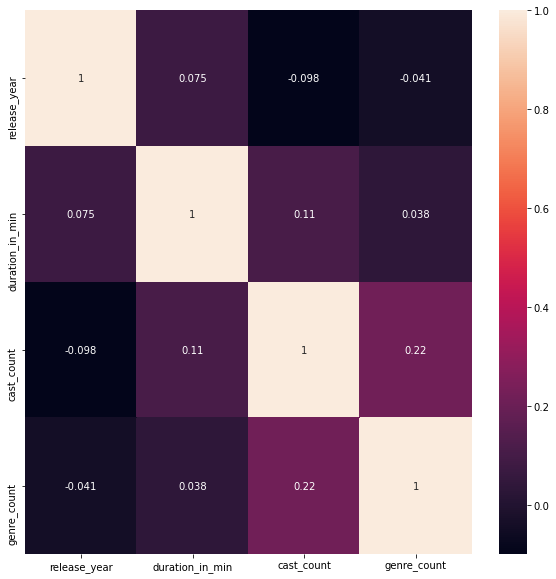

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

There is only one correlation that could be a little bit interesting: cast_count and genre-count. But all in all none of those correlation has a high value for the analysis. They are all week to almost no correlations.

### scatterplot
cast_count and genre-count correlation

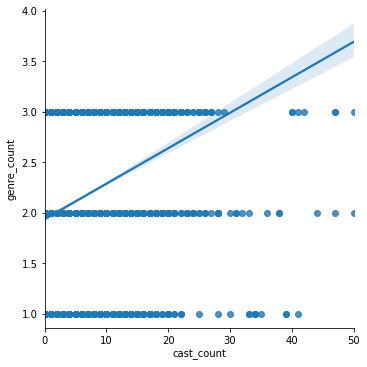

In [42]:
# creating scatterplot and saving it in a variable
castXgenre = sns.lmplot(x = 'cast_count', y = 'genre_count', data = netflix_new_columns)

Well not really anything interesting here, I recon I will need to conduct some categorial analysis to answer my questions. 

# pair plot

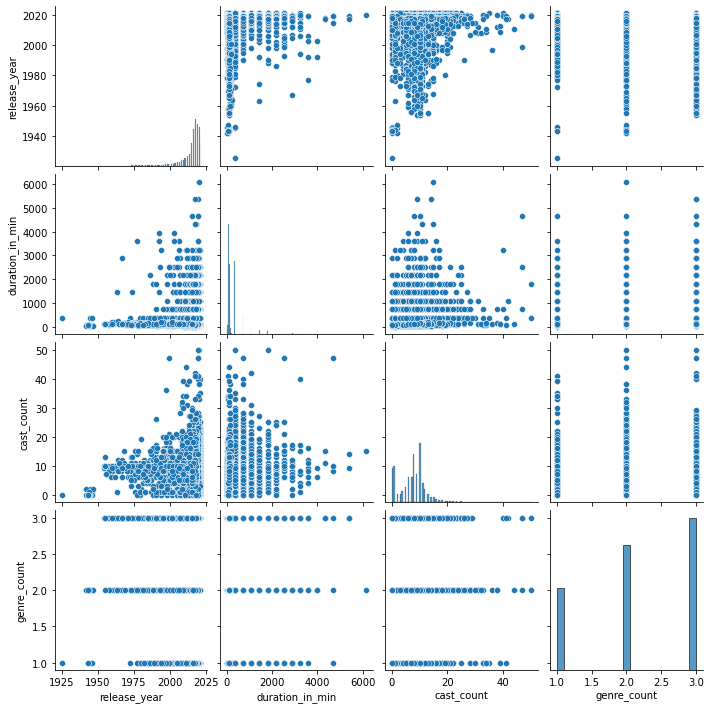

In [43]:
# creating pairplot with subset from earlier 
pair_plot = sns.pairplot(sub)

duration_in_minutes and release year looks interesting, since it seems like there seems to be a trend that series are getting longer. I know that I'm talking about series, beause there is this stripe pattern that was created through the multiplocation of series times 360, when creating the columns. There also seem to be more casts, as later the movie came out. I'm going to make more analysis in those directions.

### categorial plot
variable used: cast_count

<AxesSubplot:xlabel='cast_count', ylabel='Count'>

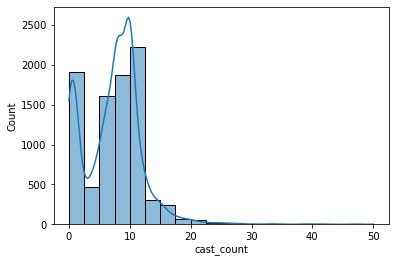

In [47]:
sns.histplot(netflix_new_columns['cast_count'], bins = 20, kde = True)

The result is, that it seems to be something straordinario that there are more than 25 casts in a movie. Also there are not often 5 - 10 casts in comparission to other value counts.

### Questions answered?
I didn't have any questions that a correlation analysis could address.

### hypothesis
Movies/ series are getting longer(durration) in the recent years. 